In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load Dataset
df = pd.read_csv('/netflix_titles.csv')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


 1. Data Exploration & Cleaning







In [ ]:
# Basic Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       8807 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# Check for missing values
df.isnull().sum()


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,0
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
# Remove duplicates
df.drop_duplicates(inplace=True)


In [ ]:
# Example: Fill missing 'country' with mode
df['country'].fillna(df['country'].mode()[0], inplace=True)


In [ ]:
# Check again
df.isnull().sum()


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,0
date_added,10
release_year,0
rating,4
duration,3


2. Descriptive Statistics


In [ ]:
df.describe(include='all')


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,8807,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,3649,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


 3. Data Visualization - Genres





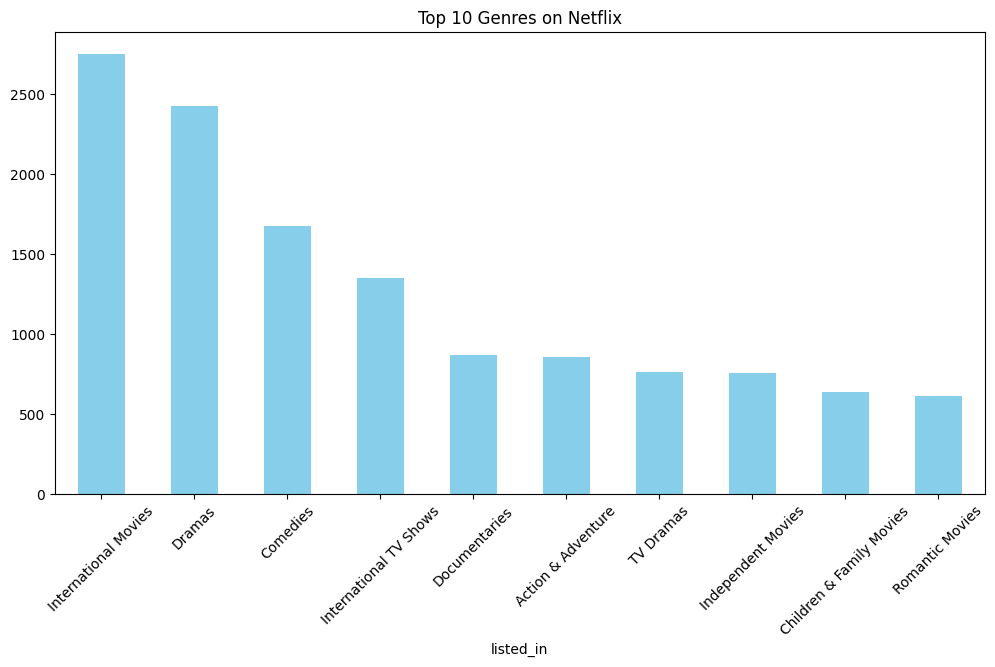

In [ ]:
# Split multiple genres
df['listed_in'] = df['listed_in'].astype(str)
genres = df['listed_in'].str.split(', ').explode()
plt.figure(figsize=(12,6))
genres.value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Genres on Netflix")
plt.xticks(rotation=45)
plt.show()


 4. Content Over the Years



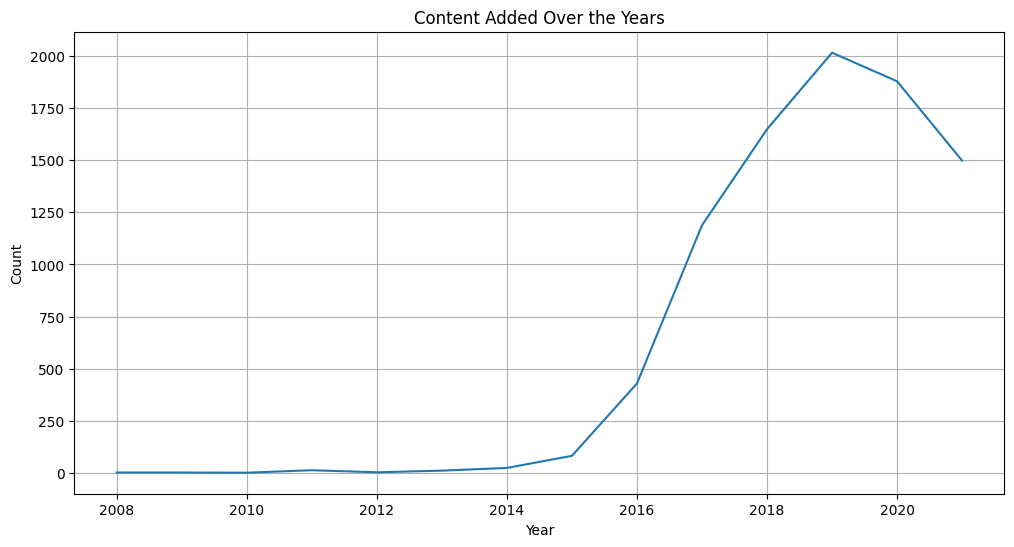

In [ ]:
df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(12,6))
plt.title("Content Added Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid()
plt.show()



🌍 5. Geographical Distribution





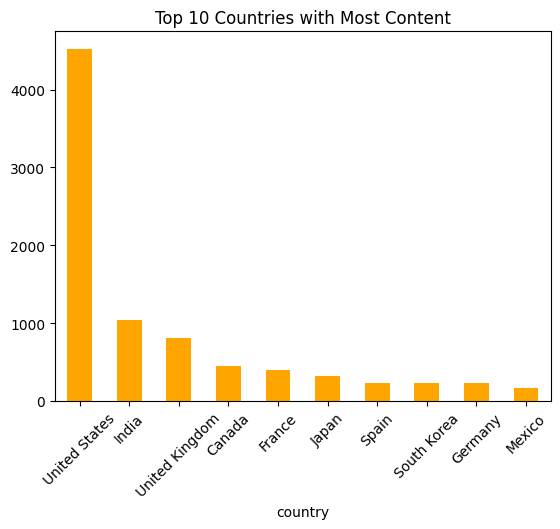

In [ ]:
country_data = df['country'].str.split(', ').explode().value_counts().head(10)
country_data.plot(kind='bar', color='orange')
plt.title("Top 10 Countries with Most Content")
plt.xticks(rotation=45)
plt.show()


 6. Content Rating Distribution

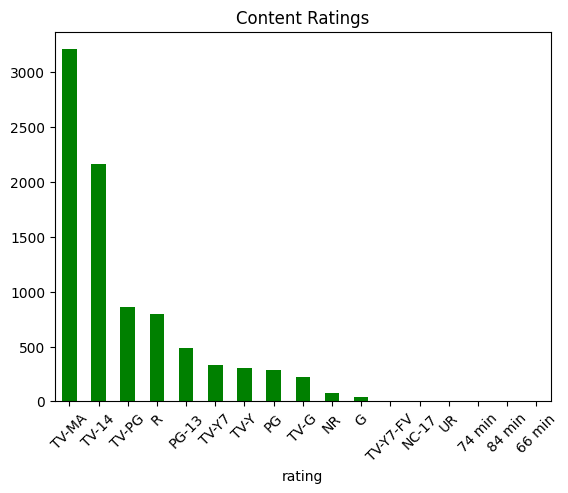

In [ ]:
df['rating'].value_counts().plot(kind='bar', color='green')
plt.title("Content Ratings")
plt.xticks(rotation=45)
plt.show()


7. Movie Duration Analysis


<ipython-input-18-be2d6c358a04>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_minutes'] = movies['duration'].str.replace(' min', '').astype(float)


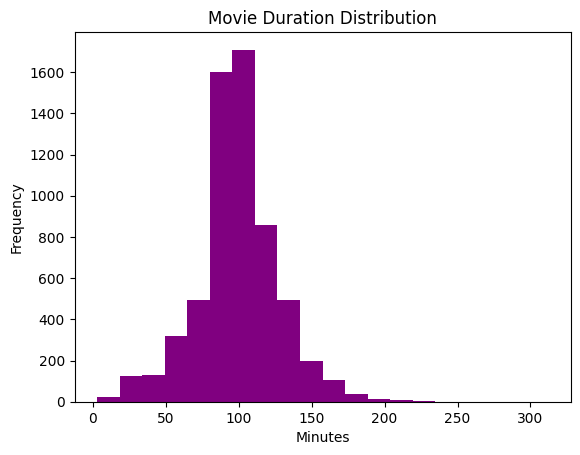

In [ ]:
# Only movies
movies = df[df['type'] == 'Movie']
movies['duration_minutes'] = movies['duration'].str.replace(' min', '').astype(float)

plt.hist(movies['duration_minutes'].dropna(), bins=20, color='purple')
plt.title("Movie Duration Distribution")
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.show()


 8. Top Movies by Title Frequency

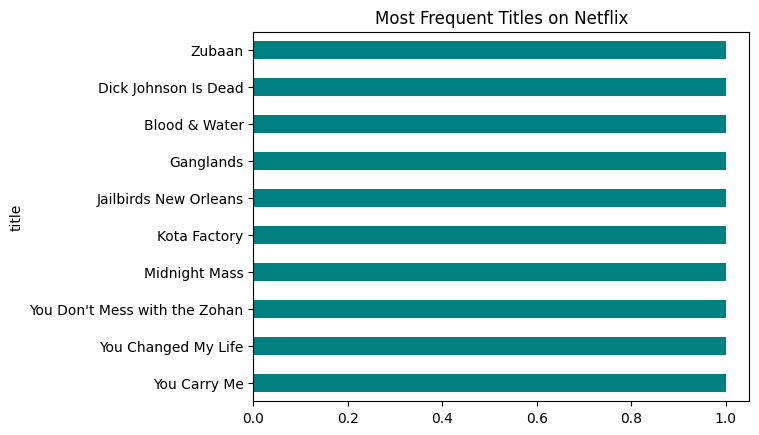

In [ ]:
df['title'].value_counts().head(10).plot(kind='barh', color='teal')
plt.title("Most Frequent Titles on Netflix")
plt.gca().invert_yaxis()
plt.show()


 9. Genre Trends Over Time


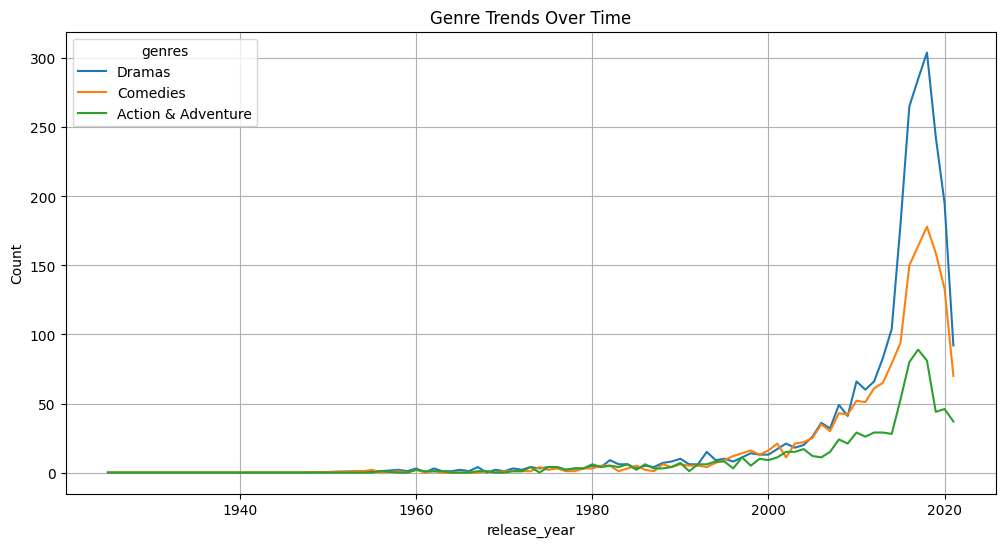

In [ ]:
genre_year = df.dropna(subset=['release_year'])
genre_year['genres'] = genre_year['listed_in'].str.split(', ')
exploded = genre_year.explode('genres')
trend = exploded.groupby(['release_year', 'genres']).size().unstack().fillna(0)
trend[['Dramas', 'Comedies', 'Action & Adventure']].plot(figsize=(12,6))
plt.title("Genre Trends Over Time")
plt.ylabel("Count")
plt.grid()
plt.show()


 10. Correlation
 (if any numeric)




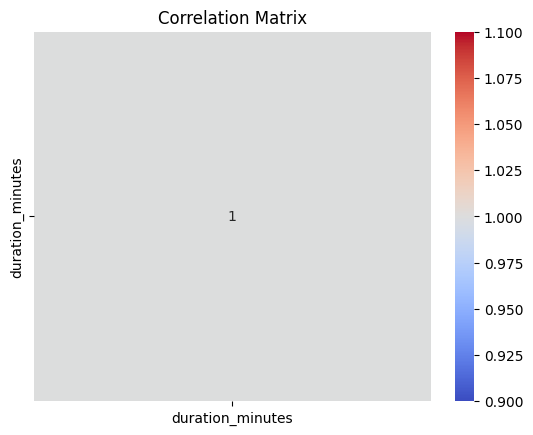

In [ ]:
# Only applicable if multiple numeric cols like ratings/duration
# Let's assume we only have duration so far
sns.heatmap(movies[['duration_minutes']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


 11. Language Distribution


In [ ]:
df['language'] = df['title'].str.extract(r'\((.*?)\)', expand=False)  # Optional extraction if language in title
# Or if 'language' column exists, use it


 12. Content Evolution


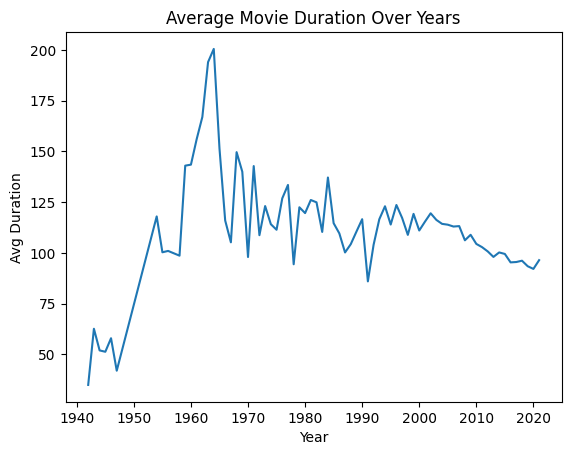

In [ ]:
movies.groupby('release_year')['duration_minutes'].mean().plot(kind='line')
plt.title("Average Movie Duration Over Years")
plt.xlabel("Year")
plt.ylabel("Avg Duration")
plt.show()


 13. User Preferences (Popular Genres)


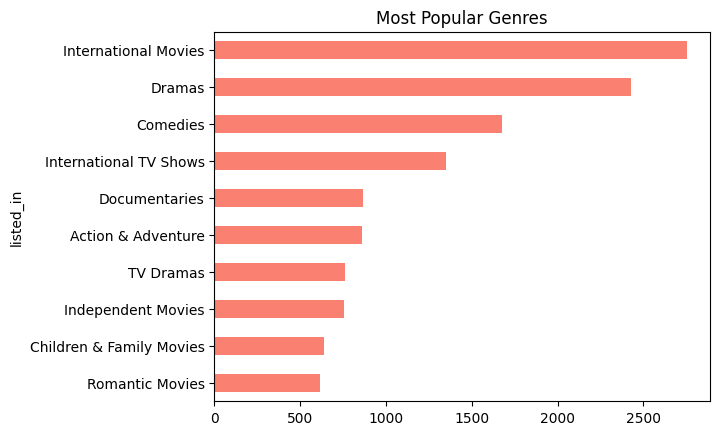

In [ ]:
genres.value_counts().head(10).plot(kind='barh', color='salmon')
plt.title("Most Popular Genres")
plt.gca().invert_yaxis()
plt.show()


 14. Conclusions & Recommendation



CONCLUSIONS:


- Drama is the most popular genre.
- Most Netflix content was added after 2015.
- US produces the most content.
- Majority of Movies are between 90-120 minutes.
- Content is growing rapidly year by year.
- Drama and Comedies are trending the most over time.

RECOMMENDATIONS:
- Focus more on producing Drama and Comedy content.
- Target US, India, UK for content production.
- Keep average movie length around 100 minutes for best engagement.
- Increase multilingual content.


In [ ]:
# presentation:

Slide 1: Title Slide
Title: Netflix Titles Dataset - Exploratory Data Analysis

Subtitle: A data-driven look at Netflix's content library

Name: Monika Bhutani

Slide 2: Introduction
Brief intro to the dataset

Goal: Understand the type, distribution, and trends in Netflix’s library

Slide 3: Dataset Overview
Total rows/columns

Column types (Title, Director, Cast, Country, etc.)

Slide 4: Data Cleaning
Handling missing values

Dropping duplicates

Type conversions

Slide 5: Content Type Distribution
Pie chart / bar graph of Movies vs TV Shows

Slide 6: Top Genres
Bar chart: Top 10 categories from listed_in

Slide 7: Country-wise Production
Top producing countries

Use of Plotly for geographic visualization (if any)

Slide 8: Content Trends Over Time
Line/bar graph: Number of releases per year

Slide 9: Popular Directors / Titles
Most frequent directors or most reused titles

